In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
## Connecting drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
## Loading the dataset

# articles = pd.read_csv('/content/drive/MyDrive/AIPROJECT/articles.csv')
# customers = pd.read_csv('/content/drive/MyDrive/AIPROJECT/customers.csv')
# sample_sub = pd.read_csv('/content/drive/MyDrive/AIPROJECT/sample_submission.csv')
# transactions_train = pd.read_csv('/content/drive/MyDrive/AIPROJECT/transactions_train.csv')

# customers.csv

In [47]:
## Loading the dataset

customers = pd.read_csv('/content/drive/MyDrive/AIPROJECT/customers.csv')

In [48]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355971 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


In [49]:
customers.head(3)

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...


FN has 65.24% missing values
Active has 66.15% missing values
club_member_status has 0.44% missing values
fashion_news_frequency has 1.17% missing values
age has 1.16% missing values


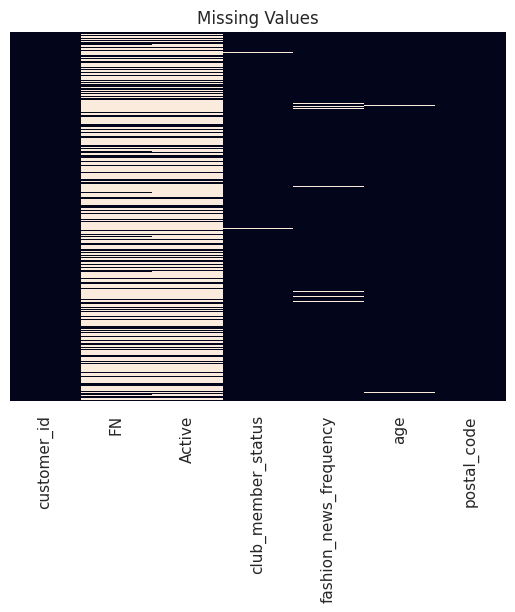

In [50]:
# checking for missing values
# printing columns with missing values and their percentage
for col in customers.columns:
    if customers[col].isnull().sum() > 0:
        print(f'{col} has {round(customers[col].isnull().sum()/len(customers[col])*100, 2)}% missing values')

# plotting the missing values
sns.heatmap(customers.isnull(), cbar=False)
plt.title('Missing Values')
plt.yticks([])
plt.show()

In [51]:
## Unique values per column
print(customers.nunique())

customer_id               1371980
FN                              1
Active                          1
club_member_status              3
fashion_news_frequency          4
age                            84
postal_code                352899
dtype: int64


In [52]:
# Unique values in the 'FN' column (Fashion newsletter)
print("Unique values in 'FN' column:", customers['FN'].unique())

Unique values in 'FN' column: [nan  1.]


In [53]:
# Unique values in the 'Active' column
print("Unique values in 'Active' column:", customers['Active'].unique())

Unique values in 'Active' column: [nan  1.]


In [54]:
# Unique values in the 'club_member_status' column
print("Unique values in 'club_member_status' column:", customers['club_member_status'].unique())
print(customers["club_member_status"].value_counts())
print("Sum non-null: ", customers["club_member_status"].value_counts().sum()) # out of 1371980

Unique values in 'club_member_status' column: ['ACTIVE' nan 'PRE-CREATE' 'LEFT CLUB']
ACTIVE        1272491
PRE-CREATE      92960
LEFT CLUB         467
Name: club_member_status, dtype: int64
Sum non-null:  1365918


In [55]:
# Unique values in the 'fashion_news_frequency' column
print("Unique values in 'fashion_news_frequency' column:", customers['fashion_news_frequency'].unique())
print(customers["fashion_news_frequency"].value_counts())
print("Sum non-null: ", customers["fashion_news_frequency"].value_counts().sum())

Unique values in 'fashion_news_frequency' column: ['NONE' 'Regularly' nan 'Monthly' 'None']
NONE         877711
Regularly    477416
Monthly         842
None              2
Name: fashion_news_frequency, dtype: int64
Sum non-null:  1355971


In [56]:
customers['age'].describe()

count    1.356119e+06
mean     3.638696e+01
std      1.431363e+01
min      1.600000e+01
25%      2.400000e+01
50%      3.200000e+01
75%      4.900000e+01
max      9.900000e+01
Name: age, dtype: float64

In [57]:
# Define a custom formatting function
def formatted_age(describe_series):
    return describe_series.apply(lambda x: f"{x:.2f}" if x.is_integer() else f"{x:.2f}")

# Apply the custom formatting function to the describe result
formatted_age = formatted_age(customers['age'].describe())

# Print the formatted result
print(formatted_age)

count    1356119.00
mean          36.39
std           14.31
min           16.00
25%           24.00
50%           32.00
75%           49.00
max           99.00
Name: age, dtype: object


In [58]:
empty_age_count = customers['age'].isnull().sum()
print("Number of empty values in 'age':", empty_age_count)

Number of empty values in 'age': 15861


In [59]:
customers["age"].value_counts()

21.0    67530
24.0    56124
20.0    55196
25.0    54989
23.0    54867
        ...  
98.0        7
97.0        4
93.0        4
96.0        3
94.0        3
Name: age, Length: 84, dtype: int64

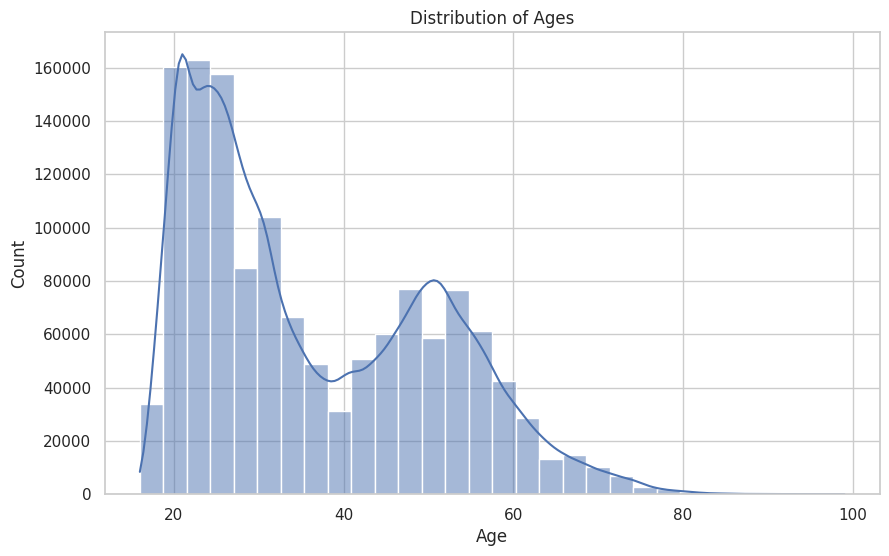

In [60]:
sns.set(style="whitegrid")  # Set the style of the plot

# Create a histogram using Seaborn
plt.figure(figsize=(10, 6))  # Set the figure size
sns.histplot(data=customers, x='age', bins=30, kde=True)  # Create a histogram with KDE overlay

# Customize the plot
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Count')

# Show the plot
plt.show()

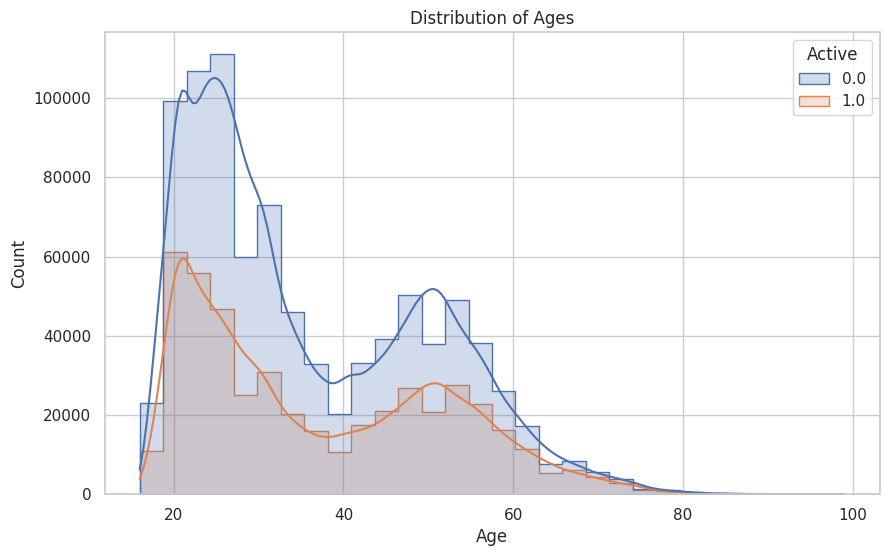

In [61]:
# Fill NaN values in the 'Active' column with 0 to represent inactive users
customers['Active'].fillna(0, inplace=True)

# Set the style of the plot
sns.set(style="whitegrid")

# Create a histogram using Seaborn for both active and non-active users
plt.figure(figsize=(10, 6))
sns.histplot(data=customers, x='age', bins=30, kde=True, hue='Active', element='step', common_norm=False)

# Customize the plot
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Count')

# Show the plot
plt.show()

In [62]:
## Format Customer ID
customers["customer_id"].iloc[0]

'00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657'

In [63]:
# Pattern to match a 64-character hexadecimal string
hexadecimal_pattern = r'^[0-9a-f]{64}$'

# Check if all customer IDs match the pattern
all_customer_ids_match = customers["customer_id"].str.match(hexadecimal_pattern).all()

if all_customer_ids_match:
    print("All customer IDs have the format of a 64-character hexadecimal string.")
else:
    print("Not all customer IDs have the format of a 64-character hexadecimal string.")

All customer IDs have the format of a 64-character hexadecimal string.


In [64]:
## Format Postal Code
customers["postal_code"].iloc[0]

'52043ee2162cf5aa7ee79974281641c6f11a68d276429a91f8ca0d4b6efa8100'

In [65]:
# Pattern to match a 64-character hexadecimal string
hexadecimal_pattern = r'^[0-9a-f]{64}$'

# Check if all postal codes match the pattern
all_postal_codes_match = customers["postal_code"].str.match(hexadecimal_pattern).all()

if all_postal_codes_match:
    print("All postal codes have the format of a 64-character hexadecimal string.")
else:
    print("Not all postal codes have the format of a 64-character hexadecimal string.")

All postal codes have the format of a 64-character hexadecimal string.


# articles.csv

In [70]:
articles = pd.read_csv('/content/drive/MyDrive/AIPROJECT/articles.csv')

In [ ]:
articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

In [ ]:
articles.head(3)

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.


detail_desc has 0.39% missing values


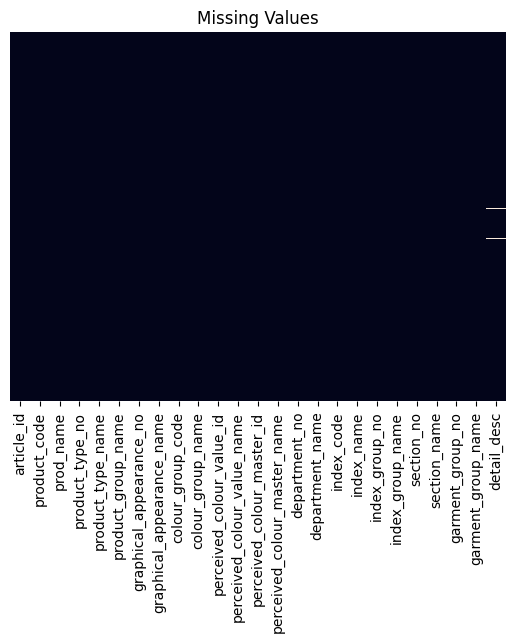

In [ ]:
# checking for missing values
# printing columns with missing values and their percentage
for col in articles.columns:
    if articles[col].isnull().sum() > 0:
        print(f'{col} has {round(articles[col].isnull().sum()/len(articles[col])*100, 2)}% missing values')

# plotting the missing values
sns.heatmap(articles.isnull(), cbar=False)
plt.title('Missing Values')
plt.yticks([])
plt.show()

In [ ]:
empty_detail_desc_count = articles['detail_desc'].isnull().sum()
print("Number of empty values in 'detail_desc':", empty_detail_desc_count)

Number of empty values in 'detail_desc': 416


In [ ]:
## Unique values per column
print(articles.nunique())

article_id                      105542
product_code                     47224
prod_name                        45875
product_type_no                    132
product_type_name                  131
product_group_name                  19
graphical_appearance_no             30
graphical_appearance_name           30
colour_group_code                   50
colour_group_name                   50
perceived_colour_value_id            8
perceived_colour_value_name          8
perceived_colour_master_id          20
perceived_colour_master_name        20
department_no                      299
department_name                    250
index_code                          10
index_name                          10
index_group_no                       5
index_group_name                     5
section_no                          57
section_name                        56
garment_group_no                    21
garment_group_name                  21
detail_desc                      43404
dtype: int64


    ('product_type_no', 'product_type_name'),                         (132,131)
    ('product_group_name', 'product_group_name'),                     ()
    ('graphical_appearance_no', 'graphical_appearance_name'),         (30,30)
    ('colour_group_code', 'colour_group_name'),                       (50,50)
    ('perceived_colour_value_id', 'perceived_colour_value_name'),     (8,8)
    ('perceived_colour_master_id', 'perceived_colour_master_name'),   (20,20)
    ('department_no', 'department_name'),                             (299,250)
    ('index_code', 'index_name'),                                     (10,10)
    ('index_group_no', 'index_group_name'),                           (5,5)
    ('section_no', 'section_name'),                                   (57,56)
    ('garment_group_no', 'garment_group_name')                        (21,21)

In [ ]:
# data distribution in the categorical columns
categorical_cols = articles.select_dtypes(include=['object']).columns

# unique values in each cateforical column
for col in categorical_cols:
    print(f'{col} has {articles[col].nunique()} unique values.')

prod_name has 45875 unique values.
product_type_name has 131 unique values.
product_group_name has 19 unique values.
graphical_appearance_name has 30 unique values.
colour_group_name has 50 unique values.
perceived_colour_value_name has 8 unique values.
perceived_colour_master_name has 20 unique values.
department_name has 250 unique values.
index_code has 10 unique values.
index_name has 10 unique values.
index_group_name has 5 unique values.
section_name has 56 unique values.
garment_group_name has 21 unique values.
detail_desc has 43404 unique values.


In [ ]:
# for col in categorical_cols:
#     unique_values = articles[col].unique()
#     print(f'Unique values in {col}: {unique_values}')


In [ ]:
## Format Article ID
articles["article_id"].iloc[1]

108775044

In [ ]:
random_article_ids = articles['article_id'].sample(n=10, random_state=42)  # You can change the random_state for different random selections

# Print the 10 random article_ids
print("Randomly selected article_ids:")
for article_id in random_article_ids:
    print(article_id)

Randomly selected article_ids:
681107007
686284001
544254002
820021001
754256001
821338004
651490003
487205007
886270006
755712001


In [ ]:
# Pattern to match the format (9 digits)
pattern = r'^\d{9}$'

# Convert the article IDs to strings and check if they all match the pattern
article_ids_as_strings = articles['article_id'].astype(str)
all_article_ids_match = article_ids_as_strings.str.match(pattern).all()

if all_article_ids_match:
    print("All article IDs, when converted to strings, follow the format (9 digits).")
else:
    print("Not all article IDs, when converted to strings, follow the format (9 digits).")

All article IDs, when converted to strings, follow the format '754256001' (9 digits).


In [ ]:
articles["article_id"].describe()

count    1.055420e+05
mean     6.984246e+08
std      1.284624e+08
min      1.087750e+08
25%      6.169925e+08
50%      7.022130e+08
75%      7.967030e+08
max      9.594610e+08
Name: article_id, dtype: float64

In [ ]:
print("Article ids range from",articles["article_id"].min(), "to", articles["article_id"].max())

Article ids range from 108775015 to 959461001


In [ ]:
## Product code
articles["product_code"].describe()

count    105542.000000
mean     698424.563378
std      128462.384432
min      108775.000000
25%      616992.500000
50%      702213.000000
75%      796703.000000
max      959461.000000
Name: product_code, dtype: float64

In [ ]:
print("Product codes range from",articles["product_code"].min(), "to", articles["product_code"].max())

Product codes range from 108775 to 959461


In [ ]:
product_code_and_name = pd.concat([articles['product_code'], articles['prod_name']], axis=1)

print(product_code_and_name)

        product_code               prod_name
0             108775               Strap top
1             108775               Strap top
2             108775           Strap top (1)
3             110065       OP T-shirt (Idro)
4             110065       OP T-shirt (Idro)
...              ...                     ...
105537        953450  5pk regular Placement1
105538        953763       SPORT Malaga tank
105539        956217         Cartwheel dress
105540        957375        CLAIRE HAIR CLAW
105541        959461            Lounge dress

[105542 rows x 2 columns]


In [ ]:
value_counts = articles['product_group_name'].value_counts()

print("Unique values in 'product_group_name' (sorted) with counts:")
for name, count in sorted(value_counts.items()):
    print(f"{name}: {count}")

Unique values in 'product_group_name' (sorted) with counts:
Accessories: 11158
Bags: 25
Cosmetic: 49
Fun: 2
Furniture: 13
Garment Full body: 13292
Garment Lower body: 19812
Garment Upper body: 42741
Garment and Shoe care: 9
Interior textile: 3
Items: 17
Nightwear: 1899
Shoes: 5283
Socks & Tights: 2442
Stationery: 5
Swimwear: 3127
Underwear: 5490
Underwear/nightwear: 54
Unknown: 121


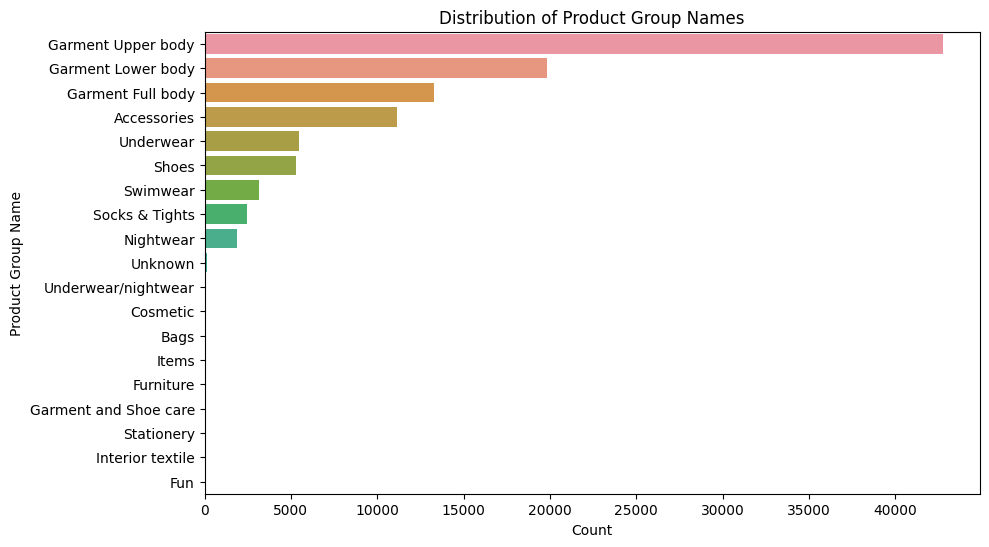

In [ ]:
# Create a bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.barplot(x=value_counts.values, y=value_counts.index, orient='h')

plt.xlabel('Count')
plt.ylabel('Product Group Name')
plt.title('Distribution of Product Group Names')
plt.show()

In [ ]:
value_counts_garment_group = articles['garment_group_name'].value_counts()

print("Unique values in 'garment_group_name' (sorted) with counts:")
for name, count in sorted(value_counts_garment_group.items()):
    print(f"{name}: {count}")

Unique values in 'garment_group_name' (sorted) with counts:
Accessories: 11519
Blouses: 5838
Dressed: 908
Dresses Ladies: 4874
Dresses/Skirts girls: 1541
Jersey Basic: 8126
Jersey Fancy: 21445
Knitwear: 7490
Outdoor: 4501
Shirts: 2116
Shoes: 5145
Shorts: 1559
Skirts: 1254
Socks and Tights: 2272
Special Offers: 1061
Swimwear: 2787
Trousers: 6727
Trousers Denim: 3100
Under-, Nightwear: 7441
Unknown: 3873
Woven/Jersey/Knitted mix Baby: 1965


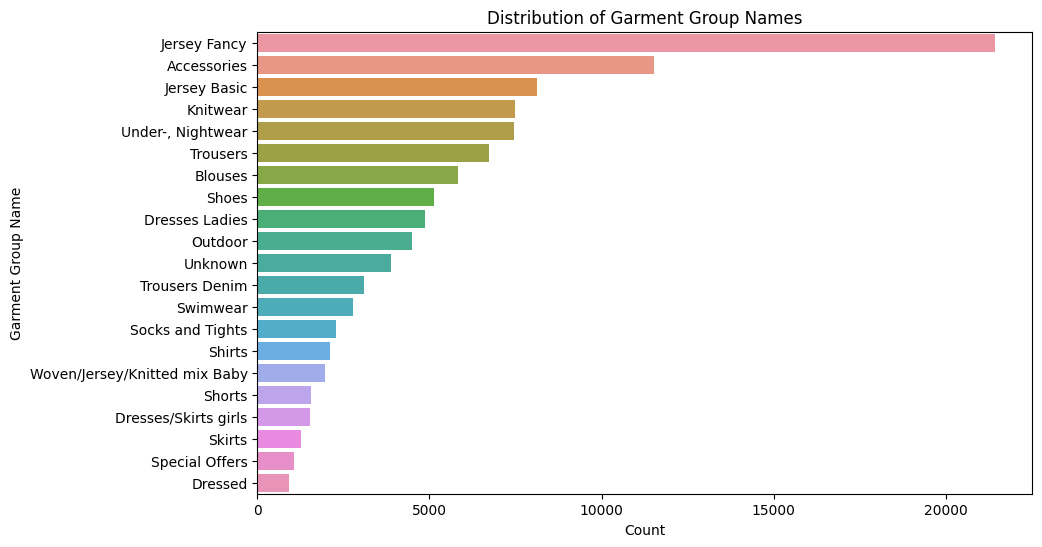

In [ ]:
# Create a bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.barplot(x=value_counts_garment_group.values, y=value_counts_garment_group.index, orient='h')

plt.xlabel('Count')
plt.ylabel('Garment Group Name')
plt.title('Distribution of Garment Group Names')
plt.show()

In [ ]:
value_counts_department_name = articles['department_name'].value_counts()

print("Unique values in 'department_name' (sorted) with counts:")
for name, count in sorted(value_counts_department_name.items()):
    print(f"{name}: {count}")

Unique values in 'department_name' (sorted) with counts:
AK Bottoms: 90
AK Dresses & Outdoor: 87
AK Other: 33
AK Tops Jersey & Woven: 42
AK Tops Knitwear: 28
Accessories: 694
Accessories Boys: 10
Accessories Other: 1
Asia Assortment: 101
Baby Boy Jersey Fancy: 872
Baby Boy Knitwear: 140
Baby Boy Local Relevance: 3
Baby Boy Outdoor: 205
Baby Boy Woven: 500
Baby Exclusive: 944
Baby Girl Jersey Fancy: 859
Baby Girl Knitwear: 257
Baby Girl Local Relevance: 6
Baby Girl Outdoor: 123
Baby Girl Woven: 521
Baby Nightwear: 420
Baby Shoes: 457
Baby Socks: 465
Baby Toys/Acc: 1054
Baby basics: 1147
Bags: 820
Bags & Items: 153
Basic 1: 1339
Basics: 284
Belts: 374
Blanks: 20
Blazer: 139
Blazer S&T: 142
Blouse: 2362
Blouse & Dress: 897
Boots: 365
Bottoms: 26
Bottoms Boys: 27
Bottoms Girls: 269
Boys Local Relevance: 106
Boys Small Acc & Bags: 55
Campaigns: 221
Casual Lingerie: 864
Clean Lingerie: 238
Conscious Exclusive: 192
Denim Other Garments: 370
Denim Trousers: 504
Denim shorts: 123
Denim trousers

In [ ]:
# Calculate the value counts for 'colour_group_name'
value_counts_colour_group_name = articles['colour_group_name'].value_counts()

print("Unique values in 'colour_group_name' (sorted) with counts:")
for name, count in sorted(value_counts_colour_group_name.items()):
    print(f"{name}: {count}")

Unique values in 'colour_group_name' (sorted) with counts:
Beige: 2712
Black: 22670
Blue: 3308
Bronze/Copper: 94
Dark Beige: 1084
Dark Blue: 12171
Dark Green: 2106
Dark Grey: 2731
Dark Orange: 886
Dark Pink: 818
Dark Purple: 315
Dark Red: 2340
Dark Turquoise: 473
Dark Yellow: 574
Gold: 1377
Green: 815
Greenish Khaki: 2767
Grey: 4487
Greyish Beige: 226
Light Beige: 3356
Light Blue: 3012
Light Green: 681
Light Grey: 2105
Light Orange: 1520
Light Pink: 5811
Light Purple: 553
Light Red: 285
Light Turquoise: 1027
Light Yellow: 984
Off White: 2726
Orange: 779
Other: 105
Other Blue: 51
Other Green: 129
Other Orange: 153
Other Pink: 750
Other Purple: 46
Other Red: 114
Other Turquoise: 14
Other Yellow: 225
Pink: 2063
Purple: 182
Red: 3056
Silver: 709
Transparent: 31
Turquoise: 435
Unknown: 28
White: 9542
Yellow: 1645
Yellowish Brown: 1471


In [ ]:
# Calculate the value counts for 'perceived_colour_value_name'
value_counts_perceived_colour_value = articles['perceived_colour_value_name'].value_counts()

print("Unique values in 'perceived_colour_value_name' (sorted) with counts:")
for name, count in sorted(value_counts_perceived_colour_value.items()):
    print(f"{name}: {count}")

Unique values in 'perceived_colour_value_name' (sorted) with counts:
Bright: 6471
Dark: 42706
Dusty Light: 22152
Light: 15739
Medium: 5711
Medium Dusty: 12630
Undefined: 105
Unknown: 28


In [ ]:
# Calculate the value counts for 'perceived_colour_master_name'
value_counts_perceived_colour_master = articles['perceived_colour_master_name'].value_counts()

print("Unique values in 'perceived_colour_master_name' (sorted) with counts:")
for name, count in sorted(value_counts_perceived_colour_master.items()):
    print(f"{name}: {count}")

Unique values in 'perceived_colour_master_name' (sorted) with counts:
Beige: 5657
Black: 22585
Blue: 18469
Bluish Green: 3
Brown: 2269
Green: 3526
Grey: 8924
Khaki green: 3181
Lilac Purple: 1100
Metal: 2180
Mole: 1223
Orange: 2734
Pink: 9403
Red: 5878
Turquoise: 1829
Unknown: 685
White: 12665
Yellow: 3121
Yellowish Green: 5
undefined: 105


# sample.csv

In [ ]:
sample_sub = pd.read_csv('/content/drive/MyDrive/AIPROJECT/sample_submission.csv')

In [ ]:
sample_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 2 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   customer_id  1371980 non-null  object
 1   prediction   1371980 non-null  object
dtypes: object(2)
memory usage: 20.9+ MB


In [ ]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  1371980 non-null  float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355971 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


In [ ]:
# Check if all customer IDs in 'customers' are also in 'sample_sub'
all_ids_match = set(customers['customer_id']).issubset(set(sample_sub['customer_id']))

# Print the result
if all_ids_match:
    print("All customer IDs in 'customers' are also in 'sample_sub'.")
else:
    print("Not all customer IDs in 'customers' are in 'sample_sub'.")

All customer IDs in 'customers' are also in 'sample_sub'.


In [ ]:
sample_sub.head(2)

,customer_id,prediction
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0706016001 0706016002 0372860001 0610776002 07...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0706016001 0706016002 0372860001 0610776002 07...


# transaction.csv

In [43]:
transactions_train = pd.read_csv('/content/drive/MyDrive/AIPROJECT/transactions_train.csv')

In [44]:
transactions_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ GB


In [79]:
# customers.info()

In [66]:
# Check if all customer IDs in 'customers' are also in 'transactions_train'
all_ids_match = set(customers['customer_id']).issubset(set(transactions_train['customer_id']))

# Print the result
if all_ids_match:
    print("All customer IDs in 'customers' are also in 'transactions_train'.")
else:
    print("Not all customer IDs in 'customers' are in 'transactions_train'.")

Not all customer IDs in 'customers' are in 'transactions_train'.


In [68]:
# Extract the customer IDs from both DataFrames
customer_ids_customers = set(customers['customer_id'])
customer_ids_transactions_train = set(transactions_train['customer_id'])

# Find the matching customer IDs
matching_ids = customer_ids_customers.intersection(customer_ids_transactions_train)

# Calculate the count of matching customer IDs
matching_count = len(matching_ids)

# Find the differential customer IDs
differential_ids_customers = customer_ids_customers - customer_ids_transactions_train
differential_ids_transactions_train = customer_ids_transactions_train - customer_ids_customers

# Convert the differential IDs to DataFrames
differential_customers_df = pd.DataFrame({'customer_id': list(differential_ids_customers)})
differential_transactions_train_df = pd.DataFrame({'customer_id': list(differential_ids_transactions_train)})

# Print the results
print("Count of Matching Customer IDs:", matching_count)

print("\nDifferential Customer IDs in 'customers' but not in 'transactions_train':")
print(differential_customers_df)

print("\nDifferential Customer IDs in 'transactions_train' but not in 'customers':")
print(differential_transactions_train_df)


Count of Matching Customer IDs: 1362281

Differential Customer IDs in 'customers' but not in 'transactions_train':
                                            customer_id
0     367878e4d74ea31c199a6788822393460c8cfa475f7f60...
1     fd3be2f6e535bed3d1b27dbda7d126acf554e745419518...
2     ef58f6e98b18cdd2a2394a459834608174ec7030769917...
3     23ad147d17f5d9b35df6fd1fa7e6b8a8af1080602df910...
4     5e282dfb570e074adbfebcb71f85abb27a7f30191ce755...
...                                                 ...
9694  f64d50f5a81621c5720bcb2473679610f861047569028d...
9695  dce13b6924801521f83c1a43f539293e004bf7b8cc9051...
9696  a424af5674248c82bd961f87cb8048efe909de1ab63c4e...
9697  72c02b85a6dce8c7fe4c148962c8f7709aa5118f19c94f...
9698  31aaebd758990e431b7dba0506033860e398ec8148cae3...

[9699 rows x 1 columns]

Differential Customer IDs in 'transactions_train' but not in 'customers':
Empty DataFrame
Columns: [customer_id]
Index: []


Similar comparaison with article ID

In [73]:
# Check if all articles IDs in 'articles' are also in 'transactions_train'
all_ids_match = set(articles['article_id']).issubset(set(transactions_train['article_id']))

# Print the result
if all_ids_match:
    print("All articles IDs in 'articles' are also in 'transactions_train'.")
else:
    print("Not all articles IDs in 'articles' are in 'transactions_train'.")

Not all articles IDs in 'articles' are in 'transactions_train'.


In [71]:
# Extract the article IDs from both DataFrames
article_ids_transactions_train = set(transactions_train['article_id'])
article_ids_articles = set(articles['article_id'])

# Find the matching article IDs
matching_article_ids = article_ids_transactions_train.intersection(article_ids_articles)

# Calculate the count of matching article IDs
matching_article_count = len(matching_article_ids)

# Find the differential article IDs
differential_article_ids_transactions_train = article_ids_transactions_train - article_ids_articles
differential_article_ids_articles = article_ids_articles - article_ids_transactions_train

# Convert the differential article IDs to DataFrames
differential_transactions_train_df = pd.DataFrame({'article_id': list(differential_article_ids_transactions_train)})
differential_articles_df = pd.DataFrame({'article_id': list(differential_article_ids_articles)})

# Print the results
print("Count of Matching Article IDs:", matching_article_count)

print("\nDifferential Article IDs in 'transactions_train' but not in 'articles':")
print(differential_transactions_train_df)

print("\nDifferential Article IDs in 'articles' but not in 'transactions_train':")
print(differential_articles_df)


Count of Matching Article IDs: 104547

Differential Article IDs in 'transactions_train' but not in 'articles':
Empty DataFrame
Columns: [article_id]
Index: []

Differential Article IDs in 'articles' but not in 'transactions_train':
     article_id
0     742742018
1     742742019
2     738859011
3     742742021
4     771328005
..          ...
990   902486003
991   870529016
992   894763001
993   874113019
994   902443007

[995 rows x 1 columns]


================

In [77]:
sales_channel_counts = transactions_train['sales_channel_id'].value_counts()

# Print the count of each sales channel ID
print(sales_channel_counts)

2    22379862
1     9408462
Name: sales_channel_id, dtype: int64


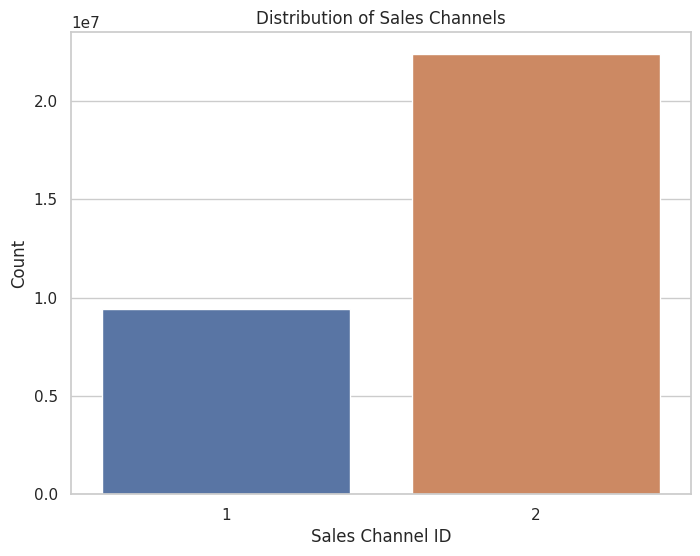

In [78]:
# Create a bar plot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=sales_channel_counts.index, y=sales_channel_counts.values)

# Customize the plot
plt.title('Distribution of Sales Channels')
plt.xlabel('Sales Channel ID')
plt.ylabel('Count')

# Show the plot
plt.show()

**online/offline channels**

In [80]:
transactions_train.head(2)

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2


In [82]:
# converting the "t_dat" column from a string to a datetime data type
transactions_train['t_dat'] = pd.to_datetime(transactions_train['t_dat'])


In [83]:
# extracting date components like year, month, day, etc.
transactions_train['year'] = transactions_train['t_dat'].dt.year
transactions_train['month'] = transactions_train['t_dat'].dt.month
transactions_train['day'] = transactions_train['t_dat'].dt.day

In [87]:
min_date = transactions_train['t_dat'].min()
max_date = transactions_train['t_dat'].max()

print("Minimum Date:", min_date)
print("Maximum Date:", max_date)

Minimum Date: 2018-09-20 00:00:00
Maximum Date: 2020-09-22 00:00:00


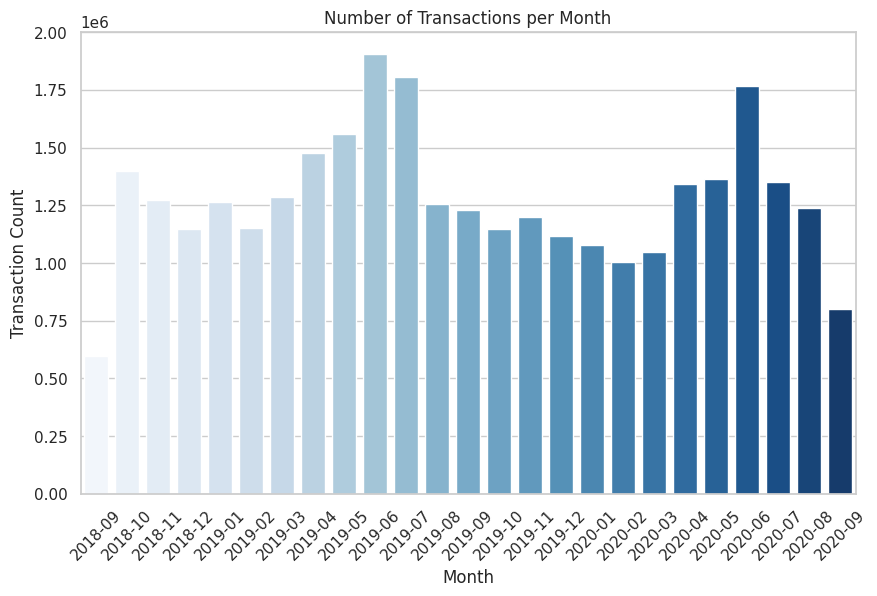

In [88]:
# Set the 't_dat' column as the DataFrame's index
transactions_train.set_index('t_dat', inplace=True)

# Resample the data to get the count of transactions per month
monthly_counts = transactions_train['article_id'].resample('M').count()

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_counts.index.strftime('%Y-%m'), y=monthly_counts.values, palette='Blues')
plt.title('Number of Transactions per Month')
plt.xlabel('Month')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45)
plt.show()

In [89]:
transactions_train['price'].describe()

count    3.178832e+07
mean     2.782927e-02
std      1.918113e-02
min      1.694915e-05
25%      1.581356e-02
50%      2.540678e-02
75%      3.388136e-02
max      5.915254e-01
Name: price, dtype: float64

In [90]:
description = transactions_train['price'].describe()

formatted_description = f"Count: {description['count']:.0f}\n" \
                        f"Mean: {description['mean']:.4f}\n" \
                        f"Std Dev: {description['std']:.4f}\n" \
                        f"Min: {description['min']:.4f}\n" \
                        f"25%: {description['25%']:.4f}\n" \
                        f"50%: {description['50%']:.4f}\n" \
                        f"75%: {description['75%']:.4f}\n" \
                        f"Max: {description['max']:.4f}"

print(formatted_description)

Count: 31788324
Mean: 0.0278
Std Dev: 0.0192
Min: 0.0000
25%: 0.0158
50%: 0.0254
75%: 0.0339
Max: 0.5915


price range is between [0, 0.59]
https://www.kaggle.com/c/h-and-m-personalized-fashion-recommendations/discussion/310496